In [1]:
# Tikhonov 正则
# 在数据中加噪音=正则
# DropOut=在层间加噪音
# 对隐藏层的结果 DropOut
# 正则项只在train中01F11DA8.png
# 推理不使用DropOut 参数固定
# 相当于很多小神经网络做集成 Hinton
# 实验中认为和正则效果一样
# DropOut 将一些输出项置零来控制模型复杂度
# MLP 中的隐藏层输出上
# p=0.5，0.9，0.1

In [2]:
import torch
from torch import nn 
from d2l import torch as d2l

In [5]:
def dropout_layer(X,dropout):
    assert 0<=dropout<=1
    if dropout==1:
        return torch.zeros_like(X)
    elif dropout==0:
        return X
    else:
        mask=(torch.rand(X.shape)>dropout).float()
        return mask*X/(1.0-dropout)
# 做乘法比取元素快很多

In [6]:
X=torch.arange(16,dtype=torch.float32).reshape(2,8)
print(X)
print(dropout_layer(X,0.0))
print(dropout_layer(X,0.5))
print(dropout_layer(X,1.0))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  6.,  8., 10.,  0.,  0.],
        [16.,  0.,  0., 22., 24.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [18]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.9, 0.9


class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)


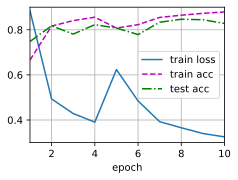

In [10]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


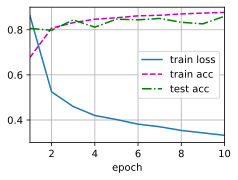

In [12]:
# 小数据集上的DropOut起很大作用
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


In [16]:
net=nn.Sequential(
    nn.Flatten(),nn.Linear(784,256),nn.ReLU(),
    nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),
    nn.Dropout(dropout2),nn.Linear(256,10),
)

def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

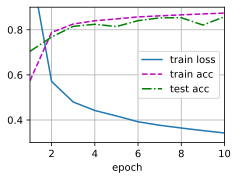

In [17]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


AssertionError: 1.995404206720988

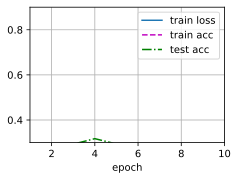

In [20]:
dropout1,dropout2=0.9,0.9
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


In [22]:
# Dropout 扔掉的权重不被更新
# cudnn
# 随机性->稳定性
# DropOut 给全连接用的
# DropOut 只改隐藏层的输出 而不去改标签
# 有随机森林和voting的想法 但是和regularization效果差不多
# DropOut可能会让收敛变慢 lr与期望方差敏感